In [1]:
import wandb
import pandas as pd
# pandas_profiling is deprecated
import ydata_profiling

run = wandb.init(project="nyc_airbnb", group="eda", save_code=True)
local_path = wandb.use_artifact("sample.csv:latest").file()
df = pd.read_csv(local_path)

<ipython-input-1-e54a27cba2e5>:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: jbca-ice (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.15.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [2]:


profile = pandas_profiling.ProfileReport(df)
profile.to_widgets()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.642800e+04,4.642800e+04,46428.000000,46428.000000,46428.000000,46428.000000,46428.000000,37246.000000,46428.000000,46428.000000
mean,1.891808e+07,6.645101e+07,40.728572,-73.950968,122.538016,6.943181,23.827712,1.377473,6.672504,109.676854
std,1.093120e+07,7.769127e+07,0.055190,0.046386,71.862581,19.877510,45.190521,1.690493,31.083436,130.413952
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.445461e+06,7.719136e+06,40.689360,-73.982100,65.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.954462e+07,3.032152e+07,40.722010,-73.954570,100.000000,2.000000,5.000000,0.715000,1.000000,40.000000
75%,2.893777e+07,1.056405e+08,40.763330,-73.934628,160.000000,5.000000,24.000000,2.020000,2.000000,217.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,350.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Fix an example data issue

Minimum nights for short stay rentals should probably not be of order three years

<AxesSubplot:>

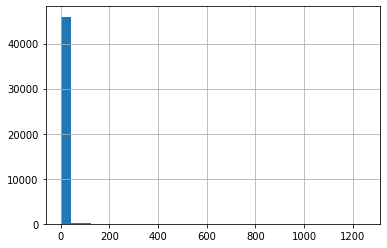

In [8]:
df['minimum_nights'].hist(bins=30)

In [11]:
df.iloc[df['minimum_nights'].argmax()]

id                                                         4204302
name                              Prime W. Village location 1 bdrm
host_id                                                   17550546
host_name                                                Genevieve
neighbourhood_group                                      Manhattan
neighbourhood                                    Greenwich Village
latitude                                                  40.73293
longitude                                                -73.99782
room_type                                          Entire home/apt
price                                                          180
minimum_nights                                                1250
number_of_reviews                                                2
last_review                                    2014-11-09 00:00:00
reviews_per_month                                             0.03
calculated_host_listings_count                                

<AxesSubplot:>

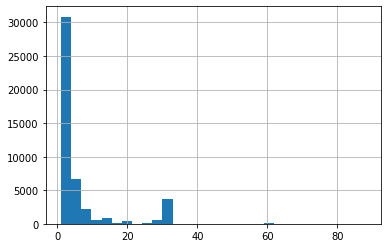

In [13]:
min_nights = 90
df = df[df['minimum_nights'] < min_nights]
df['minimum_nights'].hist(bins=30)
# 60 nights is maybe not a bug, though pushing the def. of 'short stay'

I could wrap the above param into hydra config, as a matter of best practice, but this isn't pedagocically useful

## Apply further cleaning

In [14]:
# Drop outliers
min_price = 10
max_price = 350
idx = df['price'].between(min_price, max_price)
df = df[idx].copy()
# Convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46157 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              46157 non-null  int64         
 1   name                            46142 non-null  object        
 2   host_id                         46157 non-null  int64         
 3   host_name                       46136 non-null  object        
 4   neighbourhood_group             46157 non-null  object        
 5   neighbourhood                   46157 non-null  object        
 6   latitude                        46157 non-null  float64       
 7   longitude                       46157 non-null  float64       
 8   room_type                       46157 non-null  object        
 9   price                           46157 non-null  int64         
 10  minimum_nights                  46157 non-null  int64         
 11  nu

In [ ]:
run.finish()